In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
!gdown 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 19.5MB/s]


In [3]:
df = pd.read_csv('./Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [5]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(
    df[categorical_cols]
)
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [7]:
df[categorical_cols]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [6]:
encoded_categorical_cols

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 2.]])

In [8]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [10]:
dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [11]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [13]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Random Forest

In [14]:
regressor = RandomForestRegressor(
    random_state=random_state
)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [15]:
y_pred = regressor.predict(X_val)

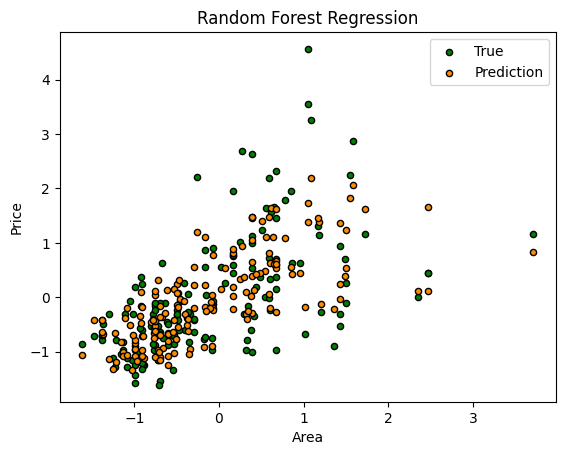

In [19]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

# AdaBoost

In [20]:
regressor = AdaBoostRegressor(
    random_state=random_state
)
regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

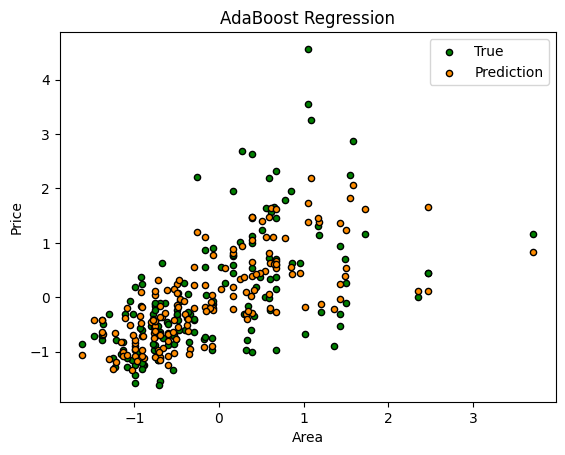

In [21]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

# Gradient Boosting

In [22]:
regressor = GradientBoostingRegressor(
    random_state=random_state
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

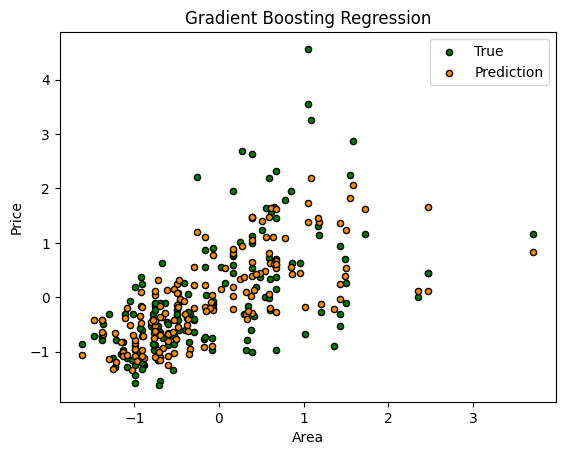

In [23]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()